In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\flood prediction\imputated weather dataset.csv")
df.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,Barisal,1949.0,1.0,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-01,0.0
1,Barisal,1949.0,2.0,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-02,0.0
2,Barisal,1949.0,3.0,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-03,0.0
3,Barisal,1949.0,4.0,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-04,0.0
4,Barisal,1949.0,5.0,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950.0,536809.8,510151.9,22.7,90.36,4.0,1949-05,0.0


In [3]:
correlation = df[['Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity',
                  'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine']].corr()
correlation

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine
Max_Temp,1.000000,0.688952,0.253387,0.025396,0.284186,0.460375,-0.061534
Min_Temp,0.688952,1.000000,0.590222,0.520185,0.364097,0.828590,-0.480457
Rainfall,0.253387,0.590222,1.000000,0.588593,0.298633,0.765067,-0.659590
Relative_Humidity,0.025396,0.520185,0.588593,1.000000,0.072059,0.648780,-0.659541
Wind_Speed,0.284186,0.364097,0.298633,0.072059,1.000000,0.366254,-0.153030
Cloud_Coverage,0.460375,0.828590,0.765067,0.648780,0.366254,1.000000,-0.723217
Bright_Sunshine,-0.061534,-0.480457,-0.659590,-0.659541,-0.153030,-0.723217,1.000000


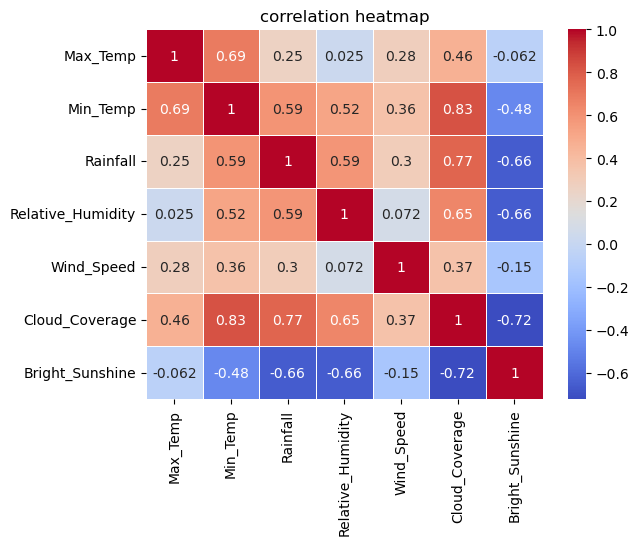

In [4]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('correlation heatmap')
plt.show()

In [5]:
threshold = 0.8
strong_corr = correlation[(correlation > threshold) & (correlation < 1.0)]

# Print the variable pairs with strong correlations
for col in strong_corr.columns:
    for idx in strong_corr.index:
        if not pd.isna(strong_corr.loc[idx, col]):
            print(f"{idx} and {col}: {strong_corr.loc[idx, col]}")


Cloud_Coverage and Min_Temp: 0.8285898789400151
Min_Temp and Cloud_Coverage: 0.8285898789400151


#### The correlation coefficient of 0.83 suggests that as Cloud_Coverage increases, Min_Temp tends to increase as well, and vice versa. This is a relatively strong positive relationship.

